In [91]:
import analysing_imaging_data as aid
import custom_plotting as cp
import custom_stats

import pandas as pd
from scipy import stats
import scikit_posthocs as sp
from statsmodels import formula
from statsmodels import api
import os


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
tidy_df_C1 = aid.read_csv_folder_into_tidy_df("./Output_C1/[a-z]*.csv")
tidy_df_C0 = aid.read_csv_folder_into_tidy_df("./Output_C0/[a-z]*.csv")

tidy_df_C0divC1 = (
    tidy_df_C0.set_index(["sample_gut_id", "sample_id", "gut_id"])
    .div(tidy_df_C1.set_index(["sample_gut_id", "sample_id", "gut_id"]))
    .reset_index()
)

In [88]:
my_pal = cp.define_pallette_tidy(tidy_df_C0divC1["sample_id"])

,a1,o1
a1,-1.000000e+00,1.411997e-12
o1,1.411997e-12,-1.000000e+00


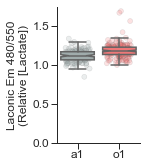

In [121]:
cp.tidy_create_strip_box_plot(
    x_figSize=cp.determine_fig_width_from_palette(my_pal),
    y_axis_limit=None,
    save_fig=False,
    data=tidy_df_C0divC1,
    y_label=cp.identify_y_axis_label(aid.exp_analysis_name()),
    x="sample_id",
    y="Mean",
    palette=my_pal,
)

In [122]:
custom_stats.kruskal_scipy_stats_tidy_df_wrapper(
    tidy_df=tidy_df_C0divC1, indep_var="sample_id", dep_var="Mean"
)

KruskalResult(statistic=50.16703875211829, pvalue=1.4119974950380333e-12)

In [123]:
sp.posthoc_dunn(
    tidy_df_C0divC1, val_col="Mean", group_col="sample_id", p_adjust="bonferroni"
)

,a1,o1
a1,-1.000000e+00,1.411997e-12
o1,1.411997e-12,-1.000000e+00


In [103]:
tidy_df_C0divC1_group = aid.grouped_tidy_data_summary_stats(
    tidy_df=tidy_df_C0divC1,
    group_col="sample_gut_id",
    agg_funcs=["mean", "median"],
    categories=tidy_df_C0divC1["sample_id"].cat.categories,
)

,a1,o1
a1,-1.000000,0.042811
o1,0.042811,-1.000000


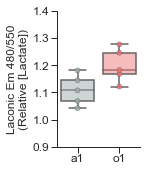

In [119]:
stat_type = "mean"

cp.tidy_create_swarm_box_plot(
    ExpName=aid.exp_analysis_name() + f"_{stat_type}",
    save_fig=False,
    data=tidy_df_C0divC1_group.query(f"summary_stat == '{stat_type}'"),
    y_axis_start=0.9,
    y_axis_limit=1.4,
    y_label=cp.identify_y_axis_label(aid.exp_analysis_name()),
    x_figSize=cp.determine_fig_width_from_palette(my_pal),
    x="sample_id",
    y="Mean",
    palette=my_pal,
)

sp.posthoc_ttest(
    tidy_df_C0divC1_group.query(f"summary_stat == '{stat_type}'"),
    val_col="Mean",
    group_col="sample_id",
    pool_sd=True,
    p_adjust="holm-sidak",
)

,a1,o1
a1,-1.000000,0.030062
o1,0.030062,-1.000000


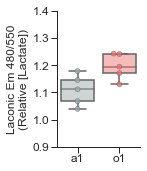

In [124]:
stat_type = "median"

cp.tidy_create_swarm_box_plot(
    ExpName=aid.exp_analysis_name() + f"_{stat_type}",
    save_fig=False,
    data=tidy_df_C0divC1_group.query(f"summary_stat == '{stat_type}'"),
    y_axis_start=0.9,
    y_axis_limit=1.4,
    y_label=cp.identify_y_axis_label(aid.exp_analysis_name()),
    x_figSize=cp.determine_fig_width_from_palette(my_pal),
    x="sample_id",
    y="Mean",
    palette=my_pal,
)

sp.posthoc_ttest(
    tidy_df_C0divC1_group.query(f"summary_stat == '{stat_type}'"),
    val_col="Mean",
    group_col="sample_id",
    pool_sd=True,
    p_adjust="holm-sidak",
)

In [128]:
tidy_df_C0divC1.to_csv(f"{aid.exp_analysis_name()}_tidy.csv")
tidy_df_C0divC1_group.to_csv(f"{aid.exp_analysis_name()}_per_gut_tidy.csv")

In [126]:
if os.path.isfile("Tidy_Image_Analysis_Template_csv.ipynb"):
    os.rename(
        "Tidy_Image_Analysis_Template_csv.ipynb",
        f"{aid.exp_analysis_name()}_csv_tidy.ipynb",
    )

In [129]:
tidy_df_C0divC1_group

,sample_gut_id,summary_stat,Area,Mean,Min,Max,sample_id,gut_id
0,a1g1,mean,1.0,1.041990,1.024010,1.049568,a1,1
1,a1g1,median,1.0,1.039687,1.067797,1.048141,a1,1
2,a1g2,mean,1.0,1.181033,1.334732,1.181867,a1,2
3,a1g2,median,1.0,1.178656,1.349283,1.186168,a1,2
4,a1g5,mean,1.0,1.144542,1.208377,1.156273,a1,5
5,a1g5,median,1.0,1.145645,1.161221,1.157352,a1,5
6,a1g6,mean,1.0,1.068775,1.059492,1.087784,a1,6
7,a1g6,median,1.0,1.067915,1.069161,1.094026,a1,6
8,a1g7,mean,1.0,1.107608,1.149029,1.125230,a1,7
9,a1g7,median,1.0,1.111447,1.110884,1.124378,a1,7
